<a href="https://colab.research.google.com/github/cleonredfield/Final_Project_Team4/blob/main/Final_Project_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team details**

Team 4:

José Eduardo Martínez Rodríguez 1843263

Ángel de Jesús Zúñiga Camporredondo 1725846

Brad Daichi Suwaki López 1729288


# **Artificial Intelligence Final Project**

# **Introduction to the project**

In this project we train a Convolutional Neural Network using a dataset from kaggle about Augmented Alzheimer MRI. The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

1. Mild Demented
2. Moderate Demented
3. Non Demented
4. Very Mild Demented

# **Libraries**

To design our project, first we import this libraries:

In [3]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import glob
from PIL import Image
from tensorflow.data import Dataset
import tensorflow.io as tfio

In [4]:
!pip install kaggle

In [12]:
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!unzip archive.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: OriginalDataset/NonDemented/31 (10).jpg  
  inflating: OriginalDataset/NonDemented/31 (100).jpg  
  inflating: OriginalDataset/NonDemented/31 (11).jpg  
  inflating: OriginalDataset/NonDemented/31 (12).jpg  
  inflating: OriginalDataset/NonDemented/31 (13).jpg  
  inflating: OriginalDataset/NonDemented/31 (14).jpg  
  inflating: OriginalDataset/NonDemented/31 (15).jpg  
  inflating: OriginalDataset/NonDemented/31 (16).jpg  
  inflating: OriginalDataset/NonDemented/31 (17).jpg  
  inflating: OriginalDataset/NonDemented/31 (18).jpg  
  inflating: OriginalDataset/NonDemented/31 (19).jpg  
  inflating: OriginalDataset/NonDemented/31 (2).jpg  
  inflating: OriginalDataset/NonDemented/31 (20).jpg  
  inflating: OriginalDataset/NonDemented/31 (21).jpg  
  inflating: OriginalDataset/NonDemented/31 (22).jpg  
  inflating: OriginalDataset/NonDemented/31 (23).jpg  
  inflating: OriginalDataset/NonDemented/31 (24).jpg  
  in

In [27]:
folder_path0='/content/AugmentedAlzheimerDataset/NonDemented'
folder_path1='/content/AugmentedAlzheimerDataset/VeryMildDemented'
folder_path2='/content/AugmentedAlzheimerDataset/MildDemented'
folder_path3='/content/AugmentedAlzheimerDataset/ModerateDemented'

In [28]:
image_files0=glob.glob(folder_path0+'/*.jpg')
image_files1=glob.glob(folder_path1+'/*.jpg')
image_files2=glob.glob(folder_path2+'/*.jpg')
image_files3=glob.glob(folder_path3+'/*.jpg')

We assign labels:

In [29]:
images=[]
labels=[]

for image_file in image_files0:
    image=Image.open(image_file)
    images.append(image)
    labels.append(0)

for image_file in image_files1:
    image=Image.open(image_file)
    images.append(image)
    labels.append(1)

for image_file in image_files2:
    image=Image.open(image_file)
    images.append(image)
    labels.append(2)

for image_file in image_files3:
    image=Image.open(image_file)
    images.append(image)
    labels.append(3)

# **Preprocessing**

In this section the images are imported, rescaled and divided into training group and validation group.

In [30]:
# Create a list of image paths and labels
image_paths = image_files0 + image_files1 + image_files2 + image_files3
labels = [0] * len(image_files0) + [1] * len(image_files1) + [2] * len(image_files2) + [3] * len(image_files3)

In [31]:
# Preprocess function
def preprocess(imagePath, label):
    image = tf.io.read_file(imagePath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, (64, 64))
    image = image / 255.0
    return image, label

In [32]:
# Apply preprocess function to image paths and labels
data = list(zip(image_paths, labels))
data = [preprocess(imagePath, label) for imagePath, label in data]

2


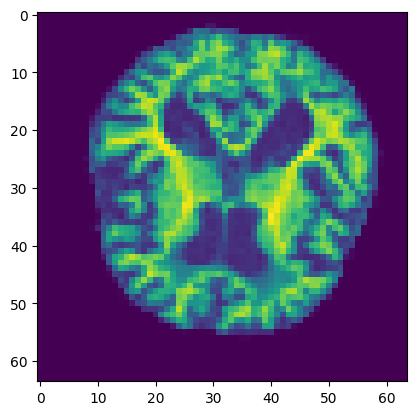

In [33]:
imgs_train, imgs_test, lbls_train, lbls_test = sklearn.model_selection.train_test_split(
    [image for image, _ in data], [label for _, label in data], test_size=0.3, random_state=42
)

plt.imshow(imgs_train[0])
print(lbls_train[0])

In [34]:
imgs_train = np.array(imgs_train)
imgs_test = np.array(imgs_test)
lbls_train = np.array(lbls_train)
lbls_test = np.array(lbls_test)

# **Structure and training of Convolutional Artificial Neural Network (CNN)**

Model structure:

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Training:

In [40]:
history = model.fit(imgs_train, lbls_train, epochs=10,
                    validation_data=(imgs_test, lbls_test))

Epoch 1/10
744/744 [==============================] - 152s 203ms/step - loss: 0.9720 - accuracy: 0.5427 - val_loss: 0.7214 - val_accuracy: 0.6729
Epoch 2/10
744/744 [==============================] - 156s 210ms/step - loss: 0.6279 - accuracy: 0.7228 - val_loss: 0.5571 - val_accuracy: 0.7519
Epoch 3/10
744/744 [==============================] - 156s 209ms/step - loss: 0.4910 - accuracy: 0.7880 - val_loss: 0.4600 - val_accuracy: 0.8050
Epoch 4/10
744/744 [==============================] - 149s 200ms/step - loss: 0.3941 - accuracy: 0.8374 - val_loss: 0.4344 - val_accuracy: 0.8145
Epoch 5/10
744/744 [==============================] - 155s 208ms/step - loss: 0.3211 - accuracy: 0.8683 - val_loss: 0.3857 - val_accuracy: 0.8441
Epoch 6/10
744/744 [==============================] - 156s 210ms/step - loss: 0.2622 - accuracy: 0.8956 - val_loss: 0.3435 - val_accuracy: 0.8631
Epoch 7/10
744/744 [==============================] - 154s 207ms/step - loss: 0.2152 - accuracy: 0.9156 - val_loss: 0.3185 -

# **CNN Accuracy Results**

319/319 - 16s - loss: 0.3246 - accuracy: 0.8857 - 16s/epoch - 51ms/step


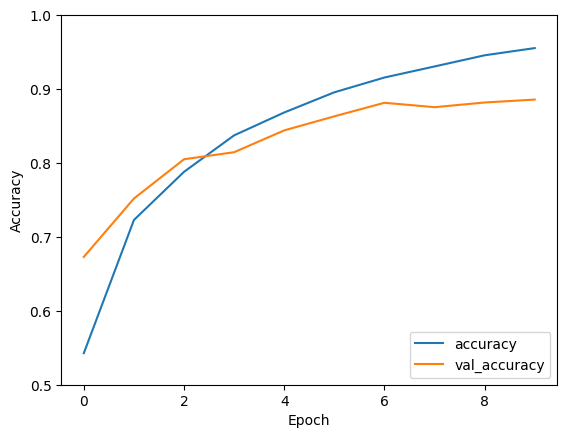

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imgs_test,  lbls_test, verbose=2)

# **Predictions with the trained CNN.**

In [42]:
predictions = model.predict(imgs_test)

319/319 [==============================] - 14s 42ms/step


In [43]:
predictions[0]

array([3.7853410e-03, 9.9621284e-01, 1.9218128e-06, 4.7394463e-16],
      dtype=float32)

In [44]:
np.argmax(predictions[0])

1

In [45]:
lbls_test[0]

1

In [46]:
class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']

In [48]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

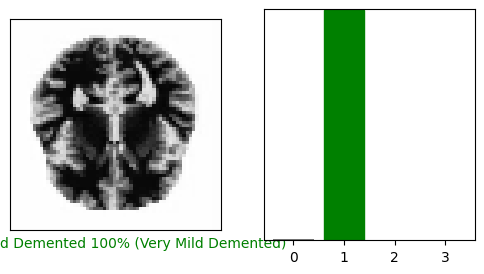

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], lbls_test, imgs_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  lbls_test)
plt.show()

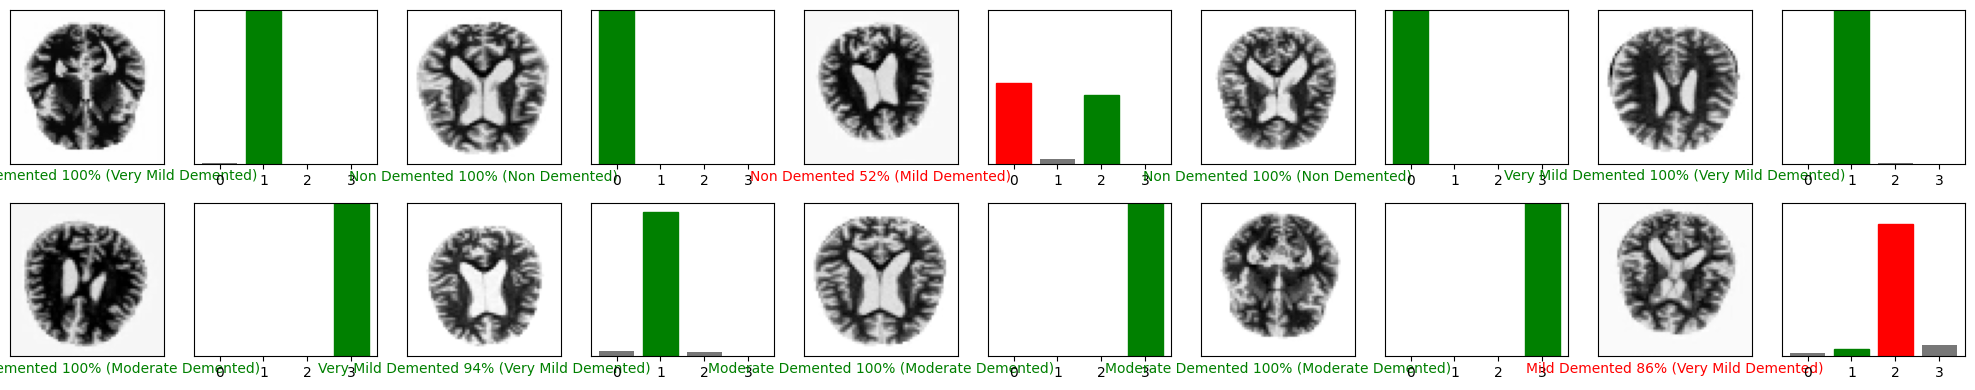

In [50]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], lbls_test, imgs_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], lbls_test)
plt.tight_layout()
plt.show()

# **References**

1. https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
2. https://www.tensorflow.org/tutorials/images/cnn?hl=es-419
3. https://keras.io/api/datasets/mnist/
4. https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset